# Music genre classification Demo

### 1. dataset preparation

To be able to train, test and validate every model, we need to prepare the dataset.

First, we need to download the dataset. 

In [ ]:
# Uncomment the following line to enable the notebook to run as a script
#!./download_extract_GTZAN.sh

If you have run the previous cell, you should have the datset downloaded and extracted in the `data` folder.

Now, we have the audio files dataset, we need to make some transformation to extract the features.

We will use the [librosa](create_dataset.py) library to extract the features and the [creat_dataset.py](create_dataset.py) script to create the dataset.

In [14]:
# We first import all the necessary modules
from create_dataset import create_dataset
from split_dataset import split_dataset
from frequency_model import FrequencyModel
from fetch_training_dataset import fetch_spectogram_dataset
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Comment if you don't want to crate dataset and just load models later
create_dataset(dataset_path_in="data/genres", dataset_path_out="data/dataset", feature="melspectrogram", n_fft= 2048, hop_length = 1024, mel_bins=128, n_mfcc=13, n_chroma=13)

Once the dataset is created, we can visualize some samples of the dataset to see if everything is ok.

Text(0.5, 1.0, 'Classical sample')

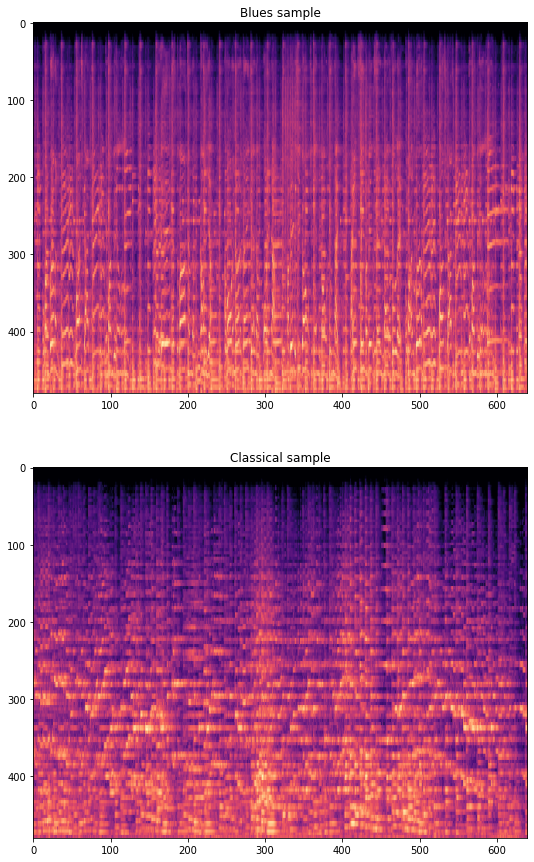

In [8]:
# Get 2 samples
blues_samples = "data/dataset/melspectrogram/blues/blues.00000.png"
classical_samples = "data/dataset/melspectrogram/classical/classical.00000.png"

# Visualize the samples
plt.figure(figsize=(10,15))

# Blues sample
plt.subplot(2,1,1)
plt.imshow(np.array(plt.imread(blues_samples)), cmap='gray')
plt.title("Blues sample")

# Classical sample
plt.subplot(2,1,2)
plt.imshow(np.array(plt.imread(classical_samples)), cmap='gray')
plt.title("Classical sample")


Now, we can split the dataset into train, validation and test sets.



In [16]:
#!python3 split_dataset.py

Dataset splitted


### 2.Train / Load the Model 

Now ce can choose to either train a new model or load a previously trained model.
But first we need to instanciate the model. 

In [11]:
# Create FrequencyModel object
fm = FrequencyModel("melspectrogram")

If we want to train a new model, we need to specify the parameters of the model and build it. 

In [12]:
#build the model
fm.build_model()

2021-12-12 11:06:46.006428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-12 11:06:46.006458: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-12 11:06:46.006482: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (test): /proc/driver/nvidia/version does not exist
2021-12-12 11:06:46.006651: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Before, we start to train the model, we need to fetch the image datasets. To do so, we use the fetch_spectrogram_dataset function that we have defined in the [fetch_training_dataset](dataset.py) module.

In [17]:
#Fetch the training dataset and the test dataset
train_generator = fetch_spectogram_dataset("data/images/"+"melspectrogram" +"/train")
validation_generator = fetch_spectogram_dataset("data/images/"+"melspectrogram" +"/validation")
test_generator = fetch_spectogram_dataset("data/images/"+"melspectrogram" +"/test")

Found 700 images belonging to 10 classes.
Found 100 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


Now, we can train the model.

In [18]:
fm.train_model(train_generator, validation_generator, epochs=100)

/home/azureuser/audio-project-groupe-n-3/frequency_model.py:64: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  self.model_history = self.model.fit_generator(train_generator, validation_data= validation_generator, epochs=epochs)


Epoch 1/100
22/22 [==============================] - 19s 840ms/step - loss: 2.5803 - accuracy: 0.0814 - val_loss: 2.2905 - val_accuracy: 0.2400
Epoch 2/100
22/22 [==============================] - 20s 902ms/step - loss: 2.2899 - accuracy: 0.1757 - val_loss: 2.2615 - val_accuracy: 0.1000
Epoch 3/100
22/22 [==============================] - 18s 803ms/step - loss: 2.2931 - accuracy: 0.1243 - val_loss: 2.2566 - val_accuracy: 0.2500
Epoch 4/100
22/22 [==============================] - 19s 842ms/step - loss: 2.2454 - accuracy: 0.1871 - val_loss: 2.2229 - val_accuracy: 0.1700
Epoch 5/100
22/22 [==============================] - 18s 807ms/step - loss: 2.2312 - accuracy: 0.1257 - val_loss: 2.2047 - val_accuracy: 0.1800
Epoch 6/100
22/22 [==============================] - 18s 808ms/step - loss: 2.2093 - accuracy: 0.1214 - val_loss: 2.1857 - val_accuracy: 0.1600
Epoch 7/100
22/22 [==============================] - 18s 804ms/step - loss: 2.2011 - accuracy: 0.1614 - val_loss: 2.1911 - val_accuracy:

Once the training is done we can save the model so that we can load it later.

In [ ]:
# Save the model
fm.save_model("models/melspectrogram/model.h5")

We visualize the history of the model to see how the training went.

In [19]:
def plot_model_history(self):
        """
        This function is used to plot the model history :
        """
        # Plot the model history
        plt.plot(self.model_history.history['loss'])
        plt.plot(self.model_history.history['accuracy'])
        plt.plot(self.model_history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Loss', 'Accuracy', 'Val accuracy'], loc='upper left')
        plt.show()

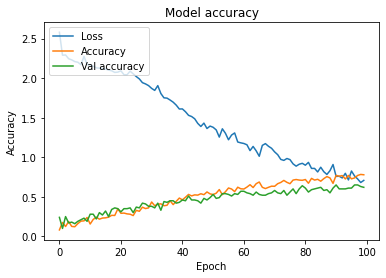

In [20]:
plot_model_history(fm)

Now, we can test the model on the test set and evaluate the performance.

In [21]:
# Evaluate the model
fm.evaluate_model(test_generator)

/home/azureuser/audio-project-groupe-n-3/frequency_model.py:94: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = self.model.evaluate_generator(test_generator)


Test accuracy: 0.5849999785423279


(1.2190903425216675, 0.5849999785423279)

We can visualize the confusion matrix to see which genre were well classified and which were not.

In [24]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(self, test_generator, classes=None):
        """
        This function is used to plot the confusion matrix :
        """
        # Predict the classes
        predictions = self.predict_classes(test_generator)
        # Plot the confusion matrix
        cm = confusion_matrix(test_generator.classes, predictions)
        if classes is None:
            classes = test_generator.class_indices.keys()
        plt.figure()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion matrix")
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)
        fmt = 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        
    
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

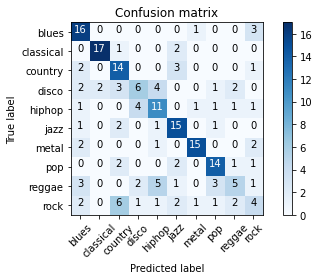

In [25]:
plot_confusion_matrix(fm, test_generator)